# Notes about the SAS's Course
## Statistics 1: Introduction to ANOVA, Regression, and Logistic Regression

This notes is based in the course materials, some codes and images are property . I made a Jupyter Notebook using JupiterLab with SAS University Edition. 

## 0. Script to setup the sesion
Run this script in the begining the each session to access the data in the correct way. 

In [1]:
%let homefolder=/folders/myfolders/ECST142;
%let Cursofolder=/folders/myfolders/Statistics1_ANOVA_Regression_LogisticRegression/;

libname STAT1 "&homefolder";
libname Curso "&Cursofolder";



options fmtsearch=(stat1.myfmts);

proc format library=stat1.myfmts;
run;

/* create macro variables to hold the names of the interval and */
/* categorical variables used in the demo and practice programs */

%let interval=Gr_Liv_Area Basement_Area Garage_Area Deck_Porch_Area 
         Lot_Area Age_Sold Bedroom_AbvGr Total_Bathroom;

%let categorical=House_Style2 Overall_Qual2 Overall_Cond2 Fireplaces 
         Season_Sold Garage_Type_2 Foundation_2 Heating_QC 
         Masonry_Veneer Lot_Shape_2 Central_Air;

SAS Connection established. Subprocess id is 1982



## 3. More Complex Linear Models

### Two-Way ANOVA and Interactions
...

#### Applying the Two-Way ANOVA Model

treatments, combinarions about factors of predictos variables. 
The term effect refers to the expected change in the response variable due to the change in value of a predictor variable. 
Interaction effects occur when the relationship between the response and a predictor changes according to another predictor in the model.
The asssumptions are the same like one-way ANOVA.

### Demo: Performing a Two-Way ANOVA Using PROC GLM

In [3]:
ods graphics off;
proc means data=STAT1.ameshousing3
           mean var std nway;
    class Season_Sold Heating_QC;
    var SalePrice;
    format Season_Sold Season.;
    title 'Selected Descriptive Statistics';
run;


proc sgplot data=STAT1.ameshousing3;
    vline Season_Sold / group=Heating_QC 
                        stat=mean 
                        response=SalePrice 
                        markers;
    format Season_Sold season.;
run; 


ods graphics on;

proc glm data=STAT1.ameshousing3 order=internal;
    class Season_Sold Heating_QC;
    model SalePrice = Heating_QC Season_Sold;
    lsmeans Season_Sold / diff adjust=tukey;
    format Season_Sold season.;
    title "Model with Heating Quality and Season as Predictors";
run;
quit;

title;

#### Practice: Performing a Two-Way ANOVA Using the NWAY ANOVA Task

Data were collected to determine whether different dosage levels of a drug have an effect on blood pressure for people with one of three types of heart disease. The data are in the drug data set.

1. Examine the data with a vertical line plot. Put BloodP on the Y axis, and DrugDose on the X axis, and then stratify by Disease.
2. What information can you obtain by looking at the data?
3. Test the hypothesis that the means are equal. Be sure to include an interaction term if the graphical analysis that you performed indicates that would be advisable.
4. What conclusions can you reach at this point?
5. To investigate the interaction effect between the two factors, manually edit the code to include an LSMEANS statement to slice the interaction by Disease.
6. Is the effect of DrugDose significant?

**Solution:**
1. Examine the data with a vertical line plot. Put BloodP on the Y axis, and DrugDose on the X axis, and then stratify by Disease.

Obs,PatientID,DrugDose,Disease,BloodP
1,69,2,B,13
2,162,4,A,-47
3,181,1,B,12

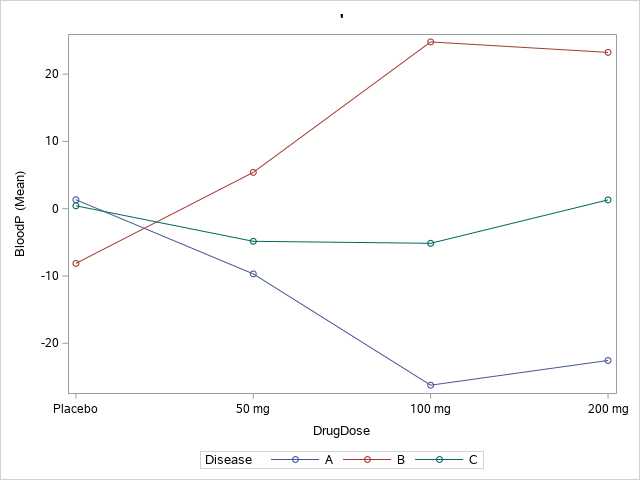

In [4]:
proc print data=STAT1.drug(obs=3);title 'data=STAT1.drug';run;
title '';
proc sgplot data=STAT1.drug; 
   vline DrugDose / group=Disease stat=mean response=BloodP markers; 
   format DrugDose dosefmt.; 
run;

2. What information can you obtain by looking at the data?: *Higher doses result in increased blood pressure for patients with disease B, decreased blood pressure for patients with disease A, and little change in blood pressure for patients with disease C.*

3. Test the hypothesis that the means are equal. Be sure to include an interaction term if the graphical analysis that you performed indicates that would be advisable.


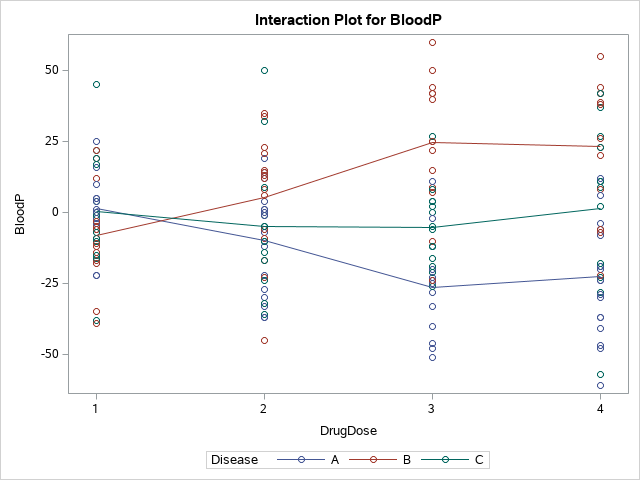

In [6]:
ods graphics on;
proc glm data=STAT1.drug plots(only)=intplot;
   class DrugDose Disease;
   model BloodP=DrugDose|Disease;
   lsmeans DrugDose*Disease;
run;
quit;

4. What conclusions can you reach at this point?: *The global F test indicates a significant difference among the different groups. Because the interaction is in the model, this is a test of all combinations of DrugDose*Disease against all other combinations. The R-square value implies that approximately 35% of the variation in BloodP can be explained by variations in the explanatory variables. The interaction term is statistically significant, as preditcted by the plot of the means.*

5. To investigate the interaction effect between the two factors, include the SLICE option by manually editing the generated code or you can write the code directly.



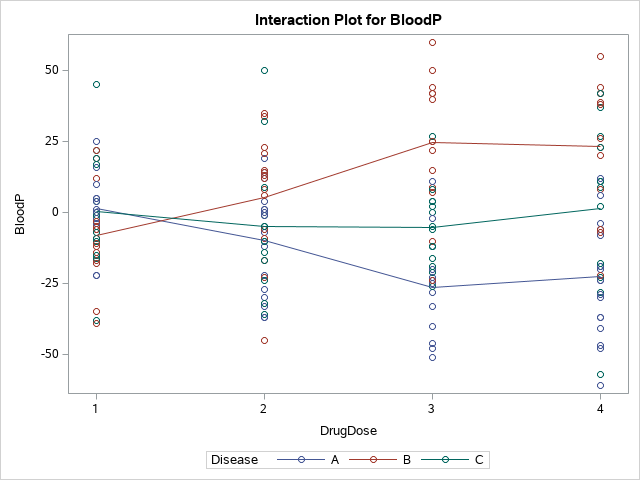

In [7]:
ods graphics on;
proc glm data=STAT1.drug plots(only)=intplot;
   class DrugDose Disease;
   model BloodP=DrugDose|Disease;
   lsmeans DrugDose*Disease / slice=Disease;
run;
quit;

6. Is the effect of DrugDose significant? *The slice table shows the effect of DrugDose at each level of the disease. The effect is significant for all, except Disease C.*

#### Demo: Fitting a Multiple Linear Regression Model Using PROC REG


#### Practice: Performing Multiple Regression Using the Linear Regression Task
Using the bodyfat2 table, fit a multiple regression model with multiple predictors, and then modify the model by removing the least significant predictors
Run a regression of PctBodyFat2 on the variables Age, Weight, Height, Neck, Chest, Abdomen, Hip, Thigh, Knee, Ankle, Biceps, Forearm, and Wrist.

Note: Turn off ODS Graphics.

Compare the ANOVA table with this one from the model with only Weight. What is different?
Analysis of Variance
Source	DF	Sum of Squares	Mean Square	F Value	Pr > F
Model	1	6593.01614	6593.01614	150.03	<.001
Error	250	10986	43.94389	 	 
Corrected Total	251	17579	 	 	 


How do the R-Square and the adjusted R-Square compare with these statistics for the Weight regression?
Root MSE	6.62902	R-Square	0.3751
Dependent Mean	19.15079	Adj R-Sq	0.3726
Coeff Var	34.61485	 	 


Did the estimate for the intercept change? Did the estimate for the coefficient of Weight change?


To simplify the model, rerun the model from step 1, but eliminate the variable with the highest p-value. Compare the output with the model from step 1.


Did the p-value for the model change?


Did the R-Square and the adjusted R-Square values change?


Did the parameter estimates and their p-values change?


To simplify the model further, rerun the model from step 5, but eliminate the variable with the highest p-value. How did the output change from the previous model?


Did the number of parameters with p-values less than 0.05 change?

![IMG](img/Practice1.jpg)

Run a regression of PctBodyFat2 on the variables Age, Weight, Height, Neck, Chest, Abdomen, Hip, Thigh, Knee, Ankle, Biceps, Forearm, and Wrist.

In [8]:
ods graphics off;
proc reg data=STAT1.BodyFat2;
    model PctBodyFat2=Age Weight Height
          Neck Chest Abdomen Hip Thigh
          Knee Ankle Biceps Forearm Wrist;
    title 'Regression of PctBodyFat2 on All '
          'Predictors';
run;
quit;

2. Compare the ANOVA table with this one from the model with only Weight. What is different?: *There are key differences between the ANOVA table for this model and the one for the simple linear regression model. The degrees of freedom for the model are much higher, 13 versus 1. Also, the Mean Square model and the F ratio are much smaller.*

3. How do the R-Square and the adjusted R-Square compare with these statistics for the Weight regression? *Both the R-Square and the adjusted R-Square for the full models are larger than the simple linear regression. The multiple regression model explains almost 75% of the variation in the PctBodtFat2 variable versus approximately 37.5% that is explained by the simple linear regression model.*

4. Did the estimate for the intercept change? Did the estimate for the coefficient of Weight change? *Yes, including the other variables in the model changed both the estimate of the intercept and the slope for Weight. Also, the p-values for both changed dramatically. The slope of Weight is now not significantly different from zero.*

5. To simplify the model, rerun the model from step 1, but eliminate the variable with the highest p-value. Compare the output with the model from step 1.


In [9]:
ods graphics off;
proc reg data=STAT1.BodyFat2;
    model PctBodyFat2=Age Weight Height
          Neck Chest Abdomen Hip Thigh
          Ankle Biceps Forearm Wrist;
    title 'Regression of PctBodyFat2 on All '
          'Predictors, Minus Knee';
run;
quit;

6. Did the p-value for the model change?: *The p-value for the model did not change to four decimal places.*
7. Did the R-Square and the adjusted R-Square values change?: *The R-Square showed essentially no change. The adjusted R-Square increased from .7348 to .7359. When an adjusted R-Square increases by removing a variable from the model, it strongly implies that the removed variable was not necessary.*
8. Did the parameter estimates and their p-values change?: *Some of the parameter estimates and their p-values changed slightly, but none to any large degree.*
9. To simplify the model further, rerun the model from step 5, but eliminate the variable with the highest p-value. How did the output change from the previous model?

In [10]:
ods graphics off;
proc reg data=STAT1.BodyFat2;
    model PctBodyFat2=Age Weight Height
          Neck Abdomen Hip Thigh
          Ankle Biceps Forearm Wrist;
    title 'Regression of PctBodyFat2 on All '
          'Predictors, Minus Knee, Chest';
run;
quit;

10. Did the number of parameters with p-values less than 0.05 change? *The p-value for Weight changed more than any other and is now slightly more than 0.05. The p-values and parameter estimates for other variables changed much less. There are no more variables in this model with p-values below 0.05, compared with the previous one.*